## **Initializing libraries and uploading data and creating data frames**

In [0]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Set ipython's max row display
pd.set_option('display.max_row', 100)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 100)


In [0]:
#uploading data
PATH1 = '/content/ces_hybrid.csv'
PATH3 = '/content/ces_hybrid_frequency_table.xls'
PATH2 = '/content/ces_hybrid_output.csv'

In [0]:
#creating data frames
import io
ces = pd.read_csv(PATH2)
original = pd.read_csv(PATH1)
frequency = pd.read_excel(PATH3)


In [0]:
# print all the imported data
frequency=frequency.dropna(axis='columns', how='all')
#print(frequency)

original=original.dropna(axis='columns', how='all')
original=original.drop_duplicates(keep='first')
original.columns=['id','description']
#print(original)

ces=ces.dropna(axis='columns', how='all')
ces=ces.drop_duplicates(keep='first')
#print(ces)

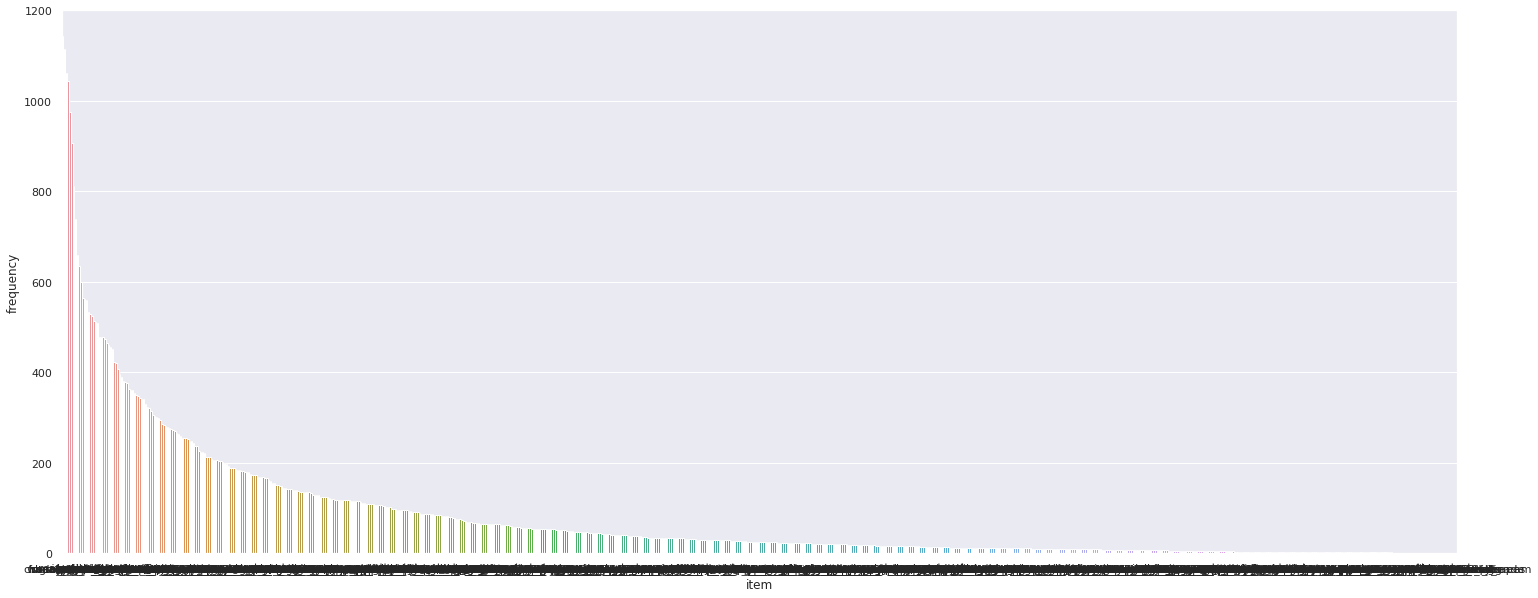

In [0]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'item', y = 'frequency', data = frequency)

## **Sort and transforming data to find out the 3 most sold items across the cities**

In [0]:
#group data by city and process the same
ces_city = ces.groupby(["city"])
'''
for key, item in ces_city:
    print(ces_city.get_group(key), "\n\n")
    
'''

'\nfor key, item in ces_city:\n    print(ces_city.get_group(key), "\n\n")\n    \n'

In [0]:
count=ces_city['description'].value_counts()
ces_city_df = count.to_frame()
#print(len(ces_city_df.columns))
#print(ces_city_df)
ces_city_df.rename(columns = {'description':'0'}, inplace = True)


In [0]:
ces_city_df.reset_index()
ces_city_df.rename(columns = {'0':'frequency'}, inplace = True)
#ces_city_df = ces_city_df.sort_values(by=['city','frequency'],ascending=[True, False])
ces_city_df=ces_city_df.sort_values(by=['city','frequency'],ascending=[True, False]).groupby('city').head (7)
ces_city_df=ces_city_df.reset_index()
ces_city_df

,city,description,frequency
0,Belem,vinegar,122
1,Belem,garlic,116
2,Belem,egg,93
3,Belem,soy_oil,91
4,Belem,tomato,91
5,Belem,mayonnaise,88
6,Belem,butter,85
7,Belo_Horizonte,egg,166
8,Belo_Horizonte,french_bread,166
9,Belo_Horizonte,vinegar,154


### **Top 10 items sold in each city**

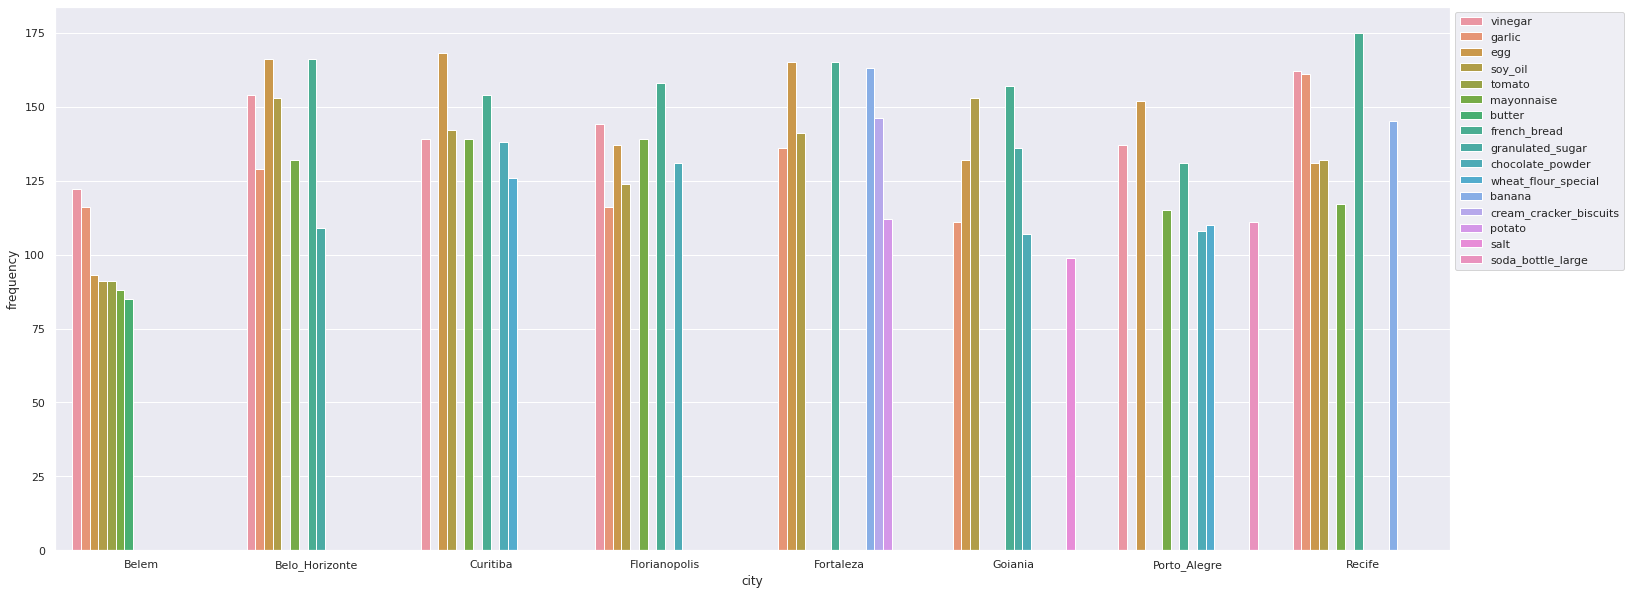

In [0]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'city', y = 'frequency', hue = 'description', data = ces_city_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))

## **Sort and transforming data to find out the 3 most sold items across the Income group**

In [0]:
#group data by city and process the same
ces_income = ces.groupby(["income"])
'''
for key, item in ces_income:
    print(ces_income.get_group(key), "\n\n")
    '''


'\nfor key, item in ces_income:\n    print(ces_income.get_group(key), "\n\n")\n    '

In [0]:
count=ces_income['description'].value_counts()
ces_income_df = count.to_frame()
#print(len(ces_income_df.columns))
#print(ces_income_df)
ces_income_df.rename(columns = {'description':'0'}, inplace = True)


In [0]:
ces_income_df.reset_index()
ces_income_df.rename(columns = {'0':'frequency'}, inplace = True)
#ces_income_df = ces_income_df.sort_values(by=['city','frequency'],ascending=[True, False])
ces_income_df = ces_income_df.sort_values(by=['income','frequency'],ascending=[True, False]).groupby('income').head(7)
ces_income_df=ces_income_df.reset_index()
ces_income_df

,income,description,frequency
0,12_to_18,vinegar,190
1,12_to_18,egg,188
2,12_to_18,french_bread,188
3,12_to_18,mayonnaise,179
4,12_to_18,soy_oil,175
5,12_to_18,garlic,160
6,12_to_18,chocolate_powder,145
7,18_to_25,french_bread,128
8,18_to_25,egg,126
9,18_to_25,vinegar,122


## **Top 7 items sold as per income group**

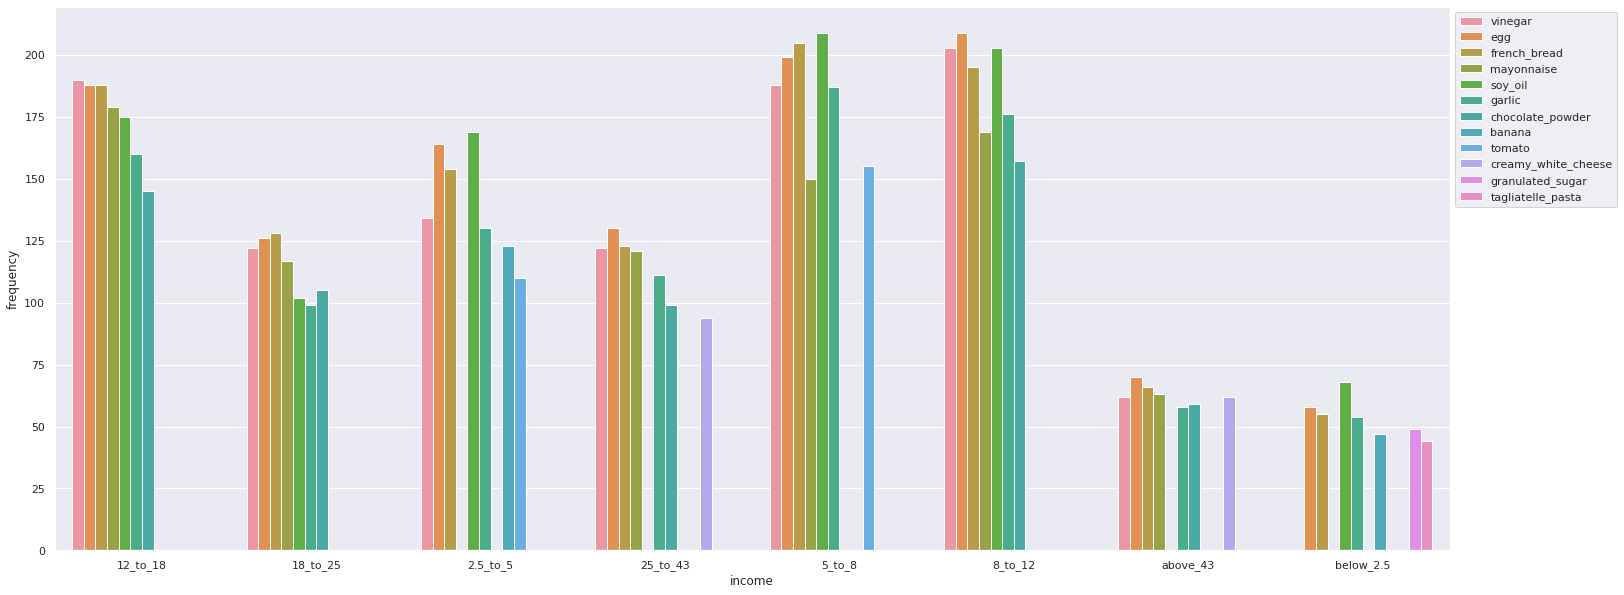

In [0]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'income', y = 'frequency', hue = 'description', data = ces_income_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))